In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
NonNurse = pd.concat(map(pd.read_csv, ['NonQ1.csv', 'NonQ2.csv','NonQ3.csv', 'NonQ4.csv']))
Nurse = pd.concat(map(pd.read_csv, ['NurQ1.csv', 'NurQ2.csv','NurQ3.csv', 'NurQ4.csv']))
prov_num = pd.read_csv('prov_num.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
NonNurse.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_Admin,...,Hrs_OthActv_ctr,Hrs_QualSocWrk,Hrs_QualSocWrk_emp,Hrs_QualSocWrk_ctr,Hrs_OthSocWrk,Hrs_OthSocWrk_emp,Hrs_OthSocWrk_ctr,Hrs_MHSvc,Hrs_MHSvc_emp,Hrs_MHSvc_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q1,20200101,52,14.50,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q1,20200102,51,9.25,...,0.0,9.25,9.25,0.0,9.0,9.0,0.0,0.0,0.0,0.0
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q1,20200103,50,15.75,...,0.0,7.50,7.50,0.0,9.5,9.5,0.0,0.0,0.0,0.0
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q1,20200104,49,7.75,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q1,20200105,49,7.75,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
nRow, nCol = NonNurse.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 5122558 rows and 81 columns


In [5]:
Nurse.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q1,20200101,52,9.25,...,0.0,98.90,98.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q1,20200102,51,8.00,...,0.0,120.40,120.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q1,20200103,50,0.00,...,0.0,119.54,119.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q1,20200104,49,0.00,...,0.0,98.58,98.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q1,20200105,49,0.00,...,0.0,107.75,107.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
nRow, nCol = Nurse.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 5158867 rows and 33 columns


In [7]:
prov_num.head()

,our_provnum
0,56360
1,465072
2,55505
3,65321
4,55744


In [8]:
prov_num.describe()

,our_provnum
count,218.000000
mean,338487.509174
std,255630.410026
min,35014.000000
25%,56342.750000
50%,440483.500000
75%,555707.500000
max,676426.000000


In [21]:
NonNurseDf = pd.merge(prov_num,NonNurse,left_on='our_provnum',right_on='PROVNUM')
del NonNurseDf['our_provnum']
NonNurseDf.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_Admin,...,Hrs_OthActv_ctr,Hrs_QualSocWrk,Hrs_QualSocWrk_emp,Hrs_QualSocWrk_ctr,Hrs_OthSocWrk,Hrs_OthSocWrk_emp,Hrs_OthSocWrk_ctr,Hrs_MHSvc,Hrs_MHSvc_emp,Hrs_MHSvc_ctr
0,56360,ARBOR GLEN CARE CENTER,GLENDORA,CA,Los Angeles,37,2020Q1,20200101,91,8.0,...,0.0,0.0,0.0,0.0,15.03,15.03,0.0,0.0,0.0,0.0
1,56360,ARBOR GLEN CARE CENTER,GLENDORA,CA,Los Angeles,37,2020Q1,20200102,91,8.0,...,0.0,0.0,0.0,0.0,16.00,16.00,0.0,0.0,0.0,0.0
2,56360,ARBOR GLEN CARE CENTER,GLENDORA,CA,Los Angeles,37,2020Q1,20200103,88,8.0,...,0.0,0.0,0.0,0.0,16.15,16.15,0.0,0.0,0.0,0.0
3,56360,ARBOR GLEN CARE CENTER,GLENDORA,CA,Los Angeles,37,2020Q1,20200104,87,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
4,56360,ARBOR GLEN CARE CENTER,GLENDORA,CA,Los Angeles,37,2020Q1,20200105,85,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


In [11]:
NonNurseDf.describe()

,COUNTY_FIPS,WorkDate,MDScensus,Hrs_Admin,Hrs_Admin_emp,Hrs_Admin_ctr,Hrs_MedDir,Hrs_MedDir_emp,Hrs_MedDir_ctr,Hrs_OthMD,...,Hrs_OthActv_ctr,Hrs_QualSocWrk,Hrs_QualSocWrk_emp,Hrs_QualSocWrk_ctr,Hrs_OthSocWrk,Hrs_OthSocWrk_emp,Hrs_OthSocWrk_ctr,Hrs_MHSvc,Hrs_MHSvc_emp,Hrs_MHSvc_ctr
count,56021.000000,5.602100e+04,56021.000000,56021.000000,56021.000000,56021.0,56021.000000,56021.0,56021.000000,56021.0,...,56021.0,56021.000000,56021.000000,56021.000000,56021.000000,56021.000000,56021.000000,56021.0,56021.0,56021.0
mean,105.521626,2.020068e+07,77.974635,5.154014,5.154014,0.0,0.311578,0.0,0.311578,0.0,...,0.0,1.197616,1.193986,0.003630,11.404551,11.400173,0.004378,0.0,0.0,0.0
std,108.505046,3.428332e+02,32.162763,4.032845,4.032845,0.0,1.107138,0.0,1.107138,0.0,...,0.0,3.274089,3.273072,0.123792,12.757358,12.758130,0.204754,0.0,0.0,0.0
min,1.000000,2.020010e+07,4.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,37.000000,2.020041e+07,54.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,71.000000,2.020071e+07,76.000000,8.000000,8.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,8.000000,8.000000,0.000000,0.0,0.0,0.0
75%,135.000000,2.020100e+07,93.000000,8.000000,8.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,16.170000,16.160000,0.000000,0.0,0.0,0.0
max,469.000000,2.020123e+07,234.000000,16.330000,16.330000,0.0,20.000000,0.0,20.000000,0.0,...,0.0,28.370000,28.370000,7.750000,115.680000,115.680000,17.240000,0.0,0.0,0.0


In [22]:
NurseDf = pd.merge(prov_num,Nurse,left_on='our_provnum',right_on='PROVNUM')
del NurseDf['our_provnum']
NurseDf.describe()

,COUNTY_FIPS,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
count,38101.000000,3.810100e+04,38101.000000,38101.000000,38101.000000,38101.000000,38101.000000,38101.000000,38101.000000,38101.000000,...,38101.000000,38101.00000,38101.000000,38101.000000,38101.000000,38101.000000,38101.000000,38101.000000,38101.000000,38101.000000
mean,126.242015,2.020069e+07,78.104932,5.476742,5.475651,0.001091,6.137149,6.136066,0.001083,27.318506,...,0.515791,146.75440,144.957693,1.796707,6.121304,6.120045,0.001260,13.217677,13.206102,0.011575
std,117.159477,3.507833e+02,31.111128,4.021543,4.020250,0.069948,7.569278,7.569188,0.093981,20.448467,...,2.823189,78.52464,77.353879,8.914919,13.128436,13.128547,0.106967,16.780574,16.770228,0.409690
min,1.000000,2.020010e+07,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.78000,8.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,2.020040e+07,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.810000,...,0.000000,92.82000,91.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.000000,2.020072e+07,77.000000,8.000000,8.000000,0.000000,3.800000,3.780000,0.000000,24.220000,...,0.000000,128.20000,127.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,167.000000,2.020101e+07,92.000000,8.000000,8.000000,0.000000,8.000000,8.000000,0.000000,36.290000,...,0.000000,174.65000,172.250000,0.000000,7.500000,7.500000,0.000000,27.790000,27.770000,0.000000
max,469.000000,2.020123e+07,234.000000,16.000000,16.000000,8.000000,61.900000,61.900000,8.500000,166.530000,...,57.580000,529.11000,529.110000,174.000000,134.270000,134.270000,12.000000,123.210000,123.210000,28.500000


In [23]:
NurseDf.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,55505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73,2020Q1,20200101,43,8.0,...,0.0,93.03,93.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73,2020Q1,20200102,43,0.0,...,0.0,86.76,86.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73,2020Q1,20200103,45,0.0,...,0.0,89.12,89.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73,2020Q1,20200104,44,0.0,...,0.0,97.25,97.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55505,ARROYO VISTA NURSING CENTER,SAN DIEGO,CA,San Diego,73,2020Q1,20200105,44,0.0,...,0.0,105.15,105.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [38]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

In [26]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

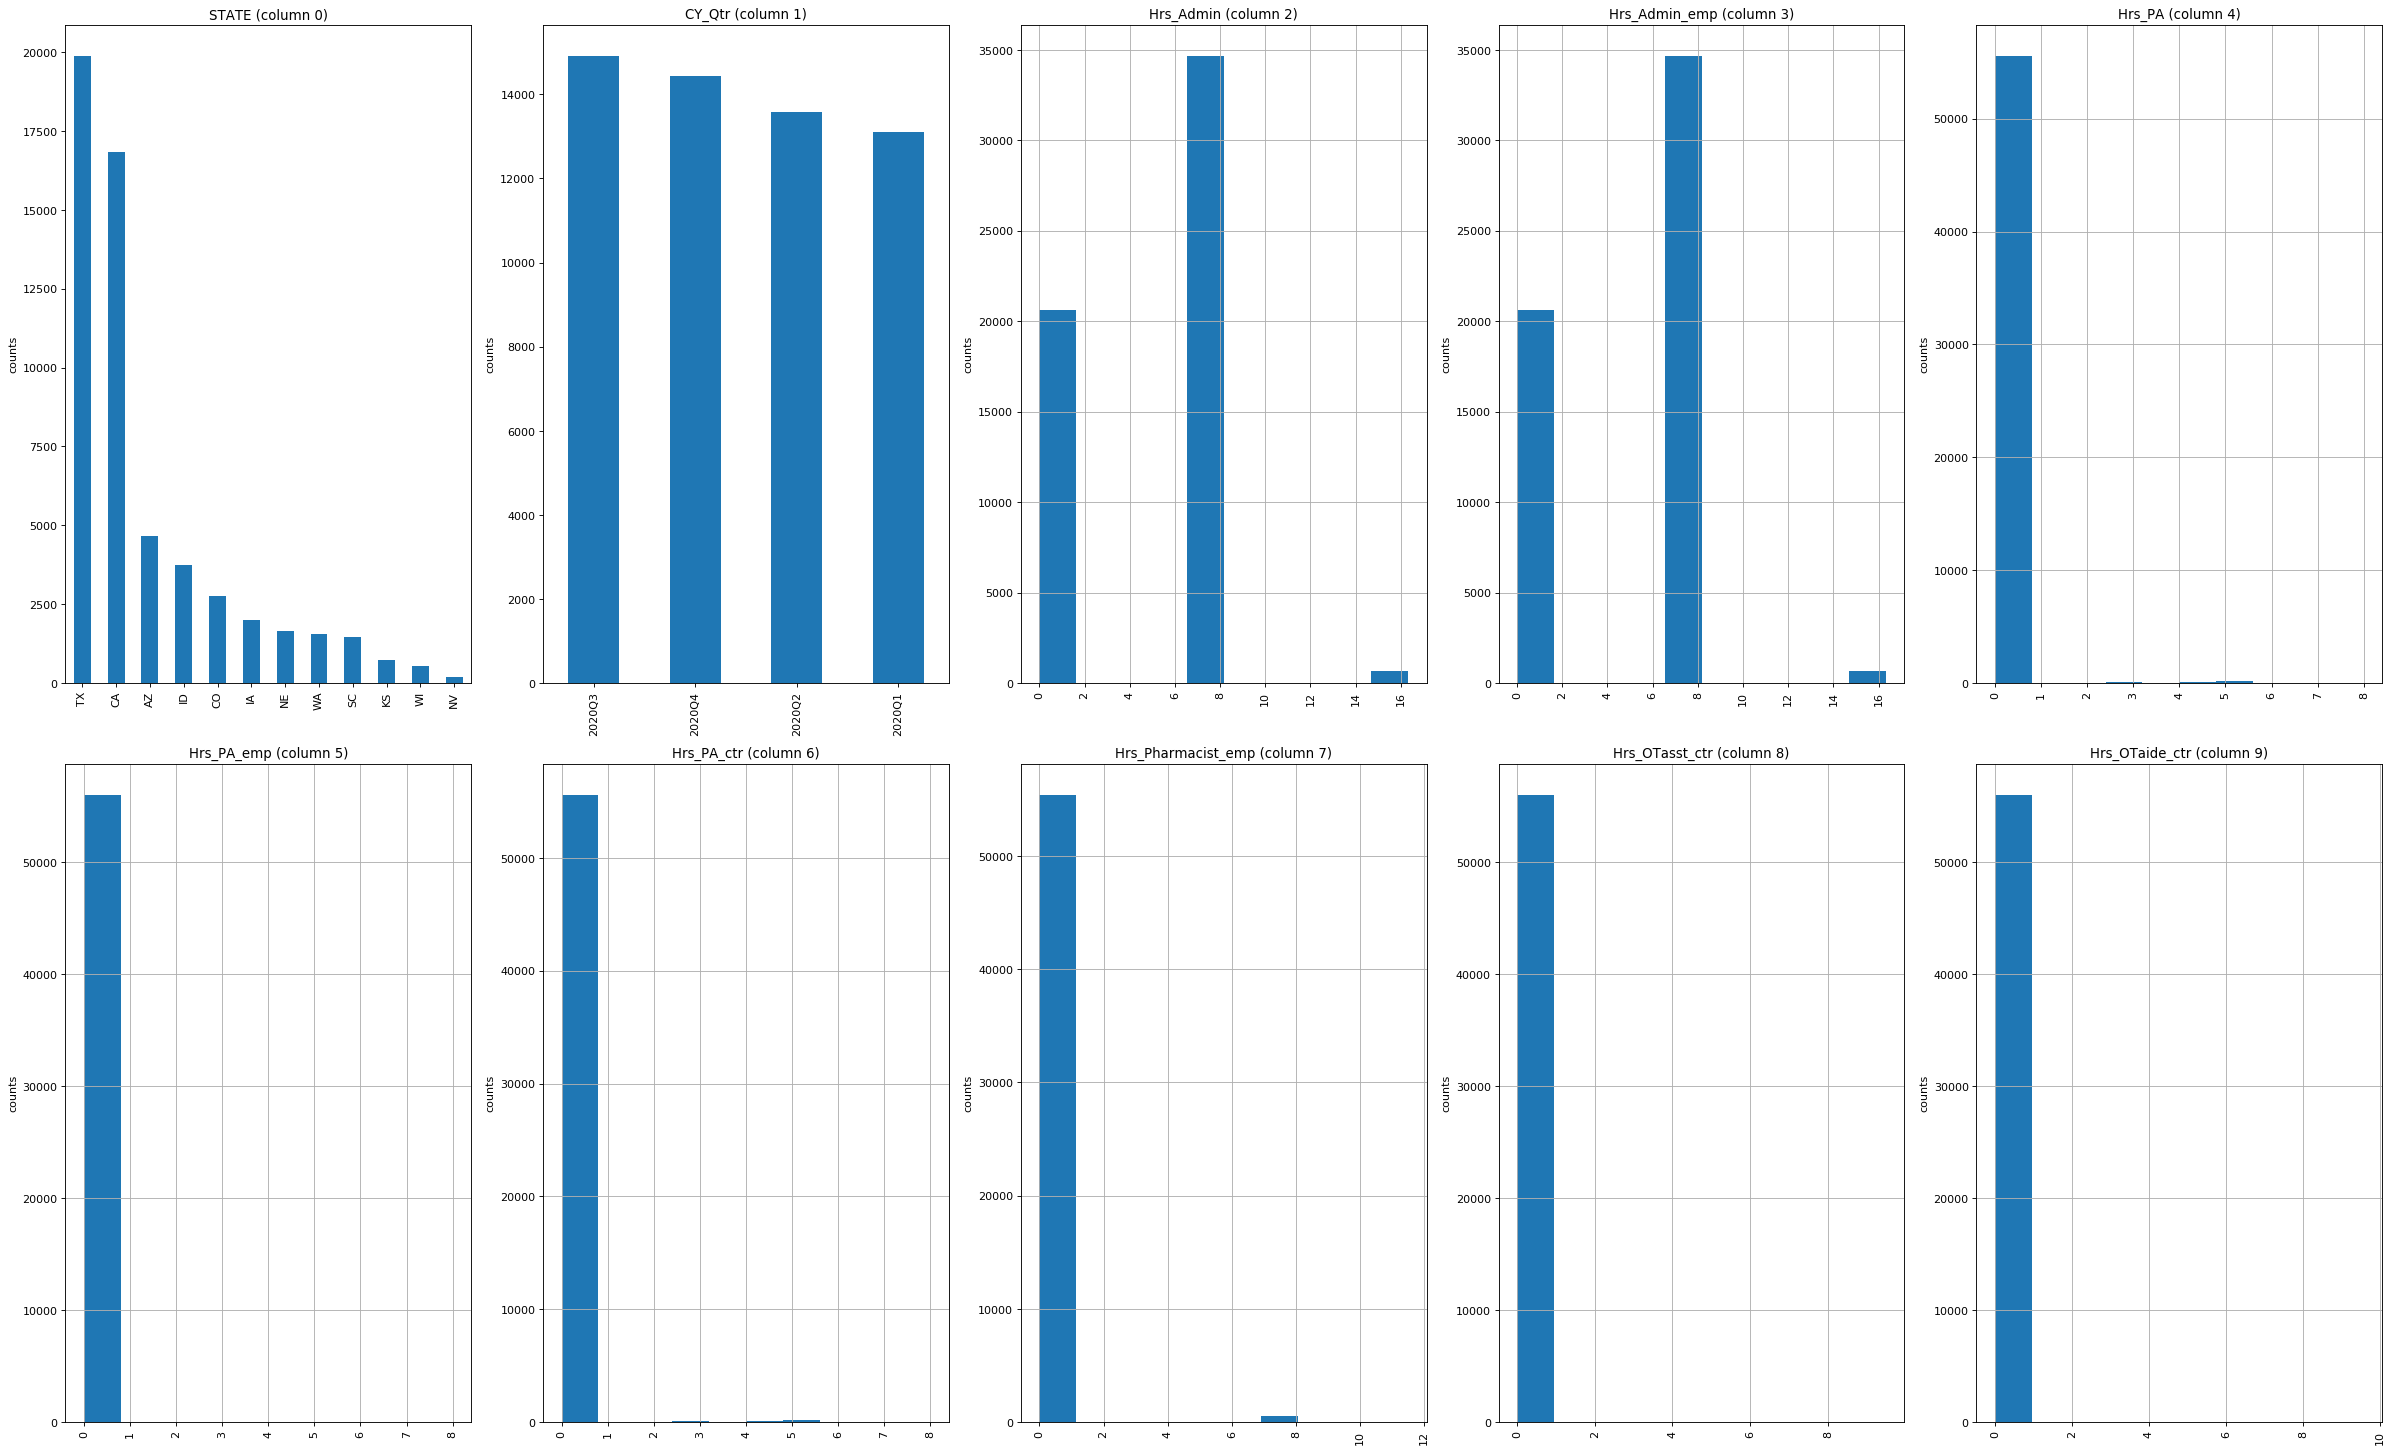

In [27]:
plotPerColumnDistribution(NonNurseDf, 10, 5)

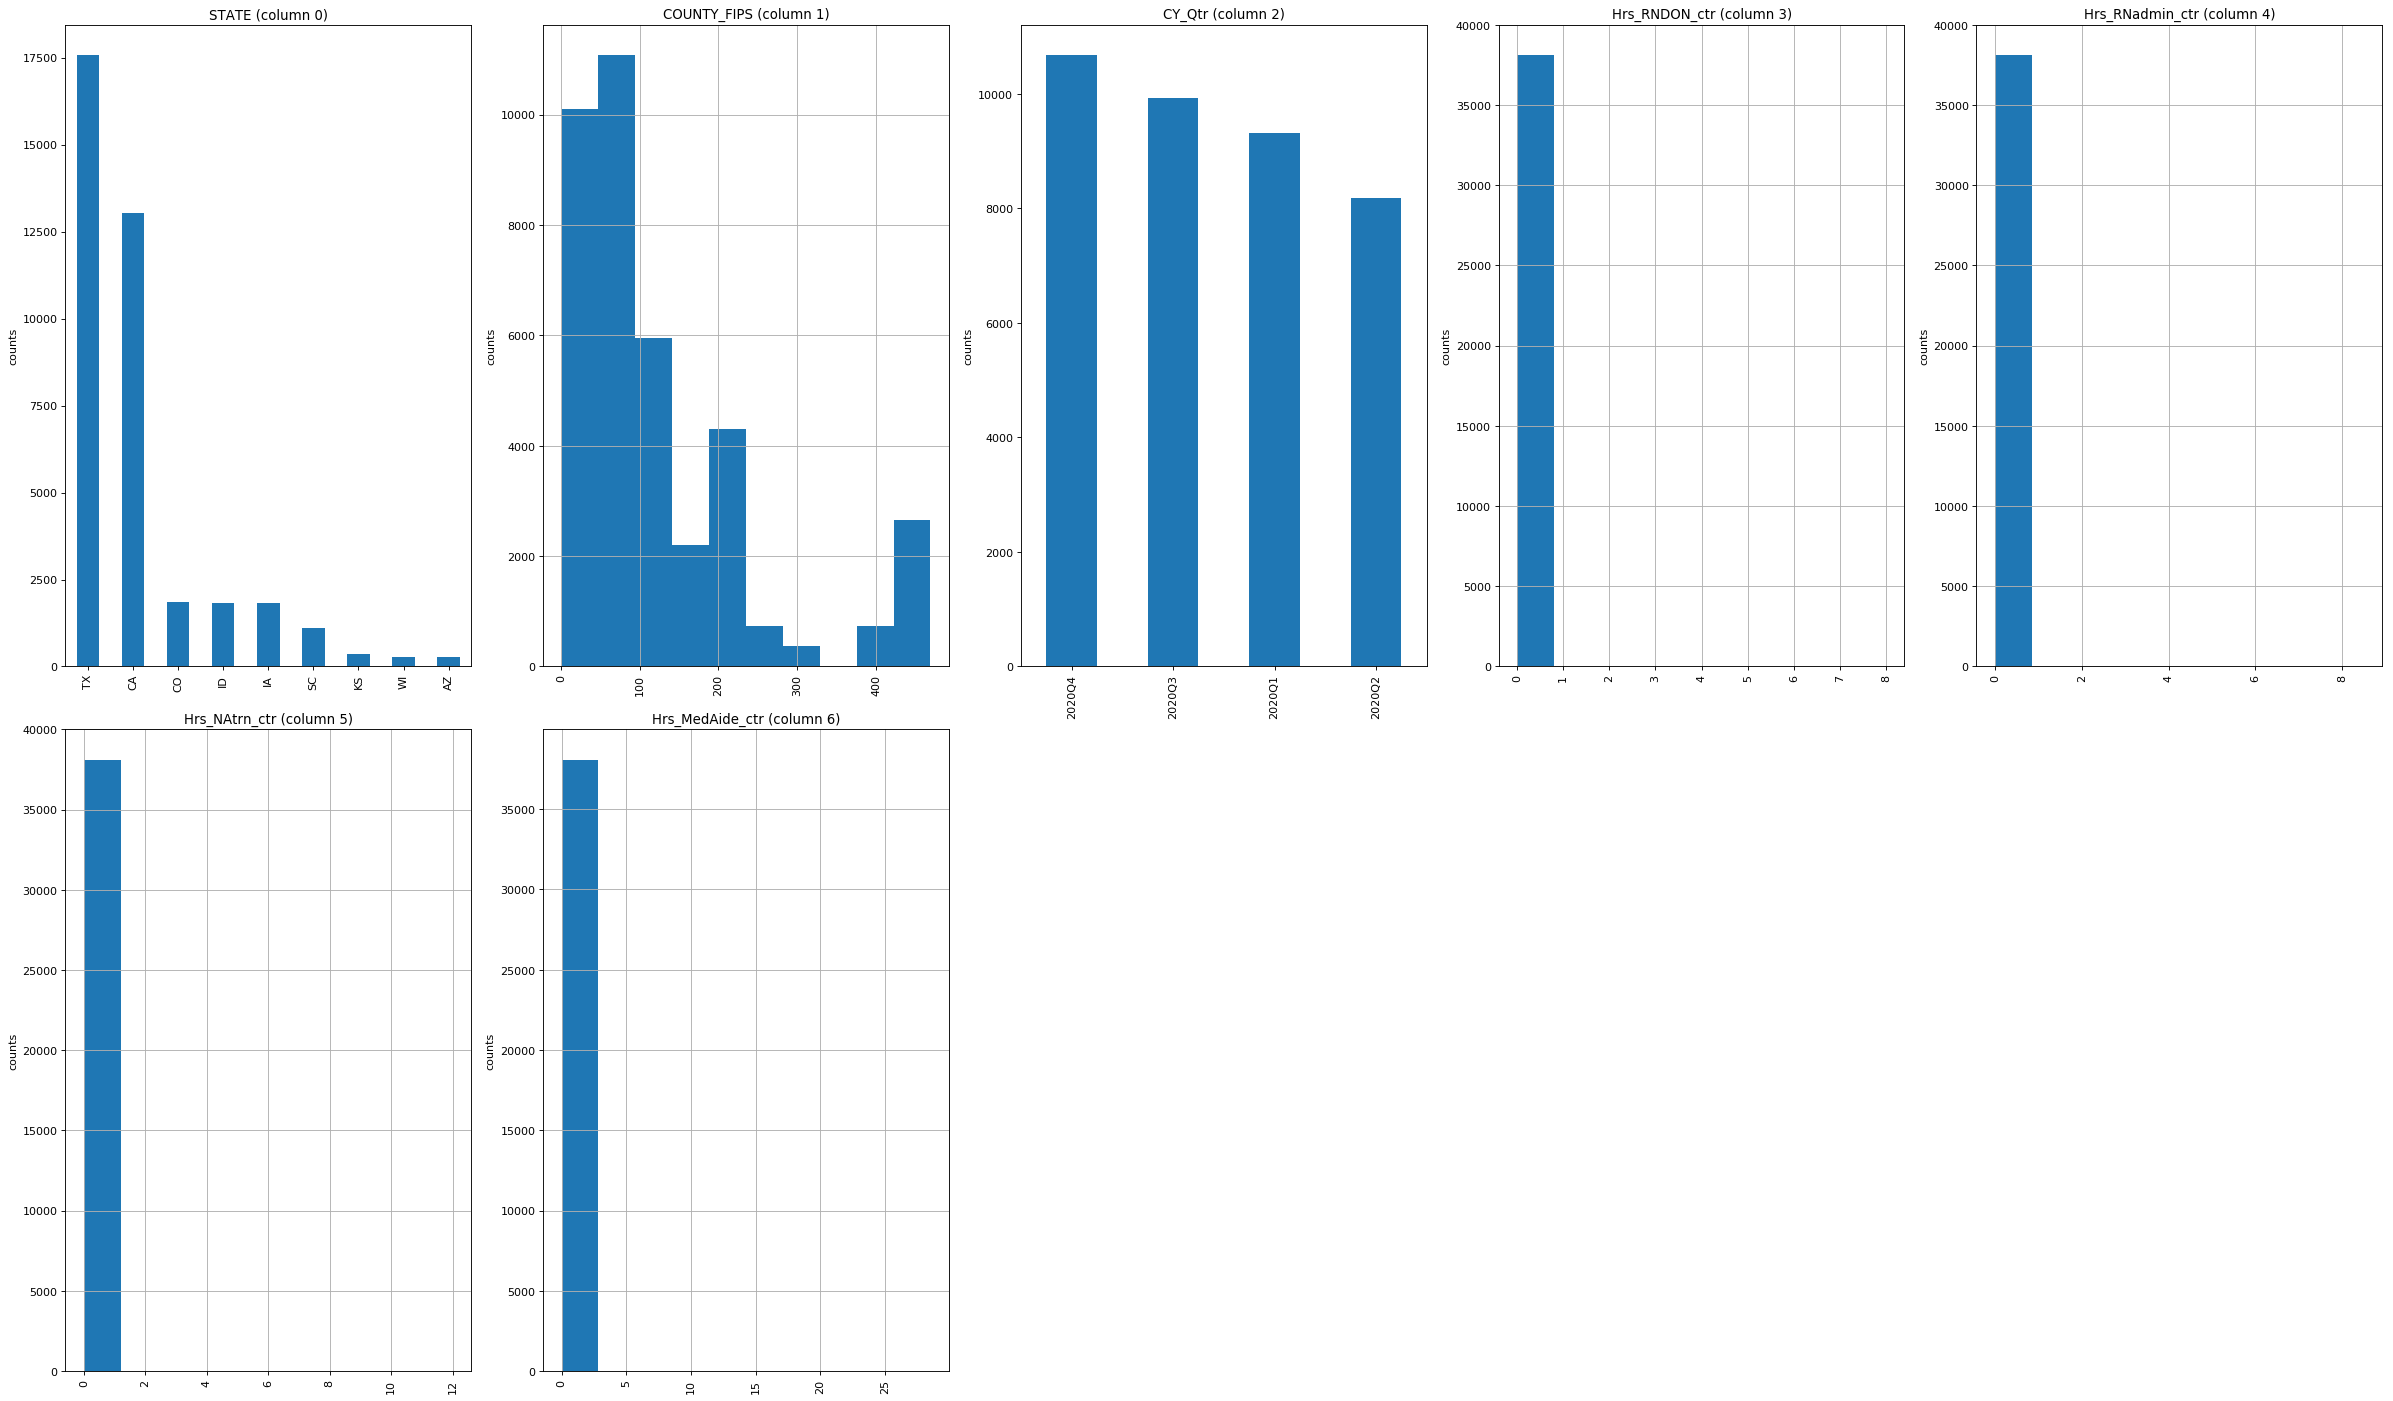

In [28]:
plotPerColumnDistribution(NurseDf, 10, 5)

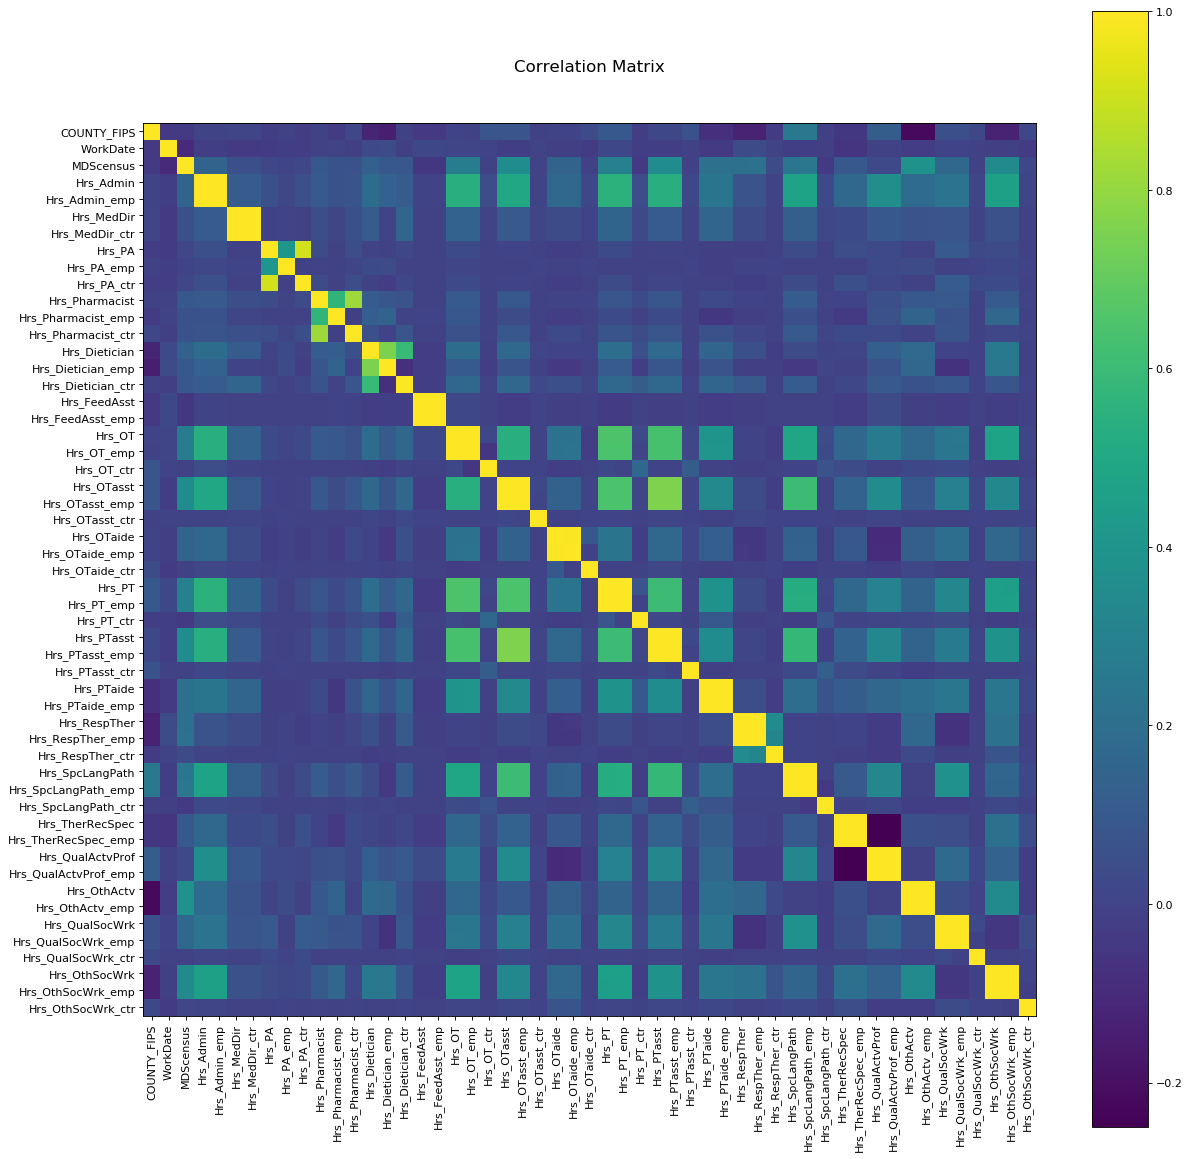

In [39]:
plotCorrelationMatrix(NonNurseDf, 18)


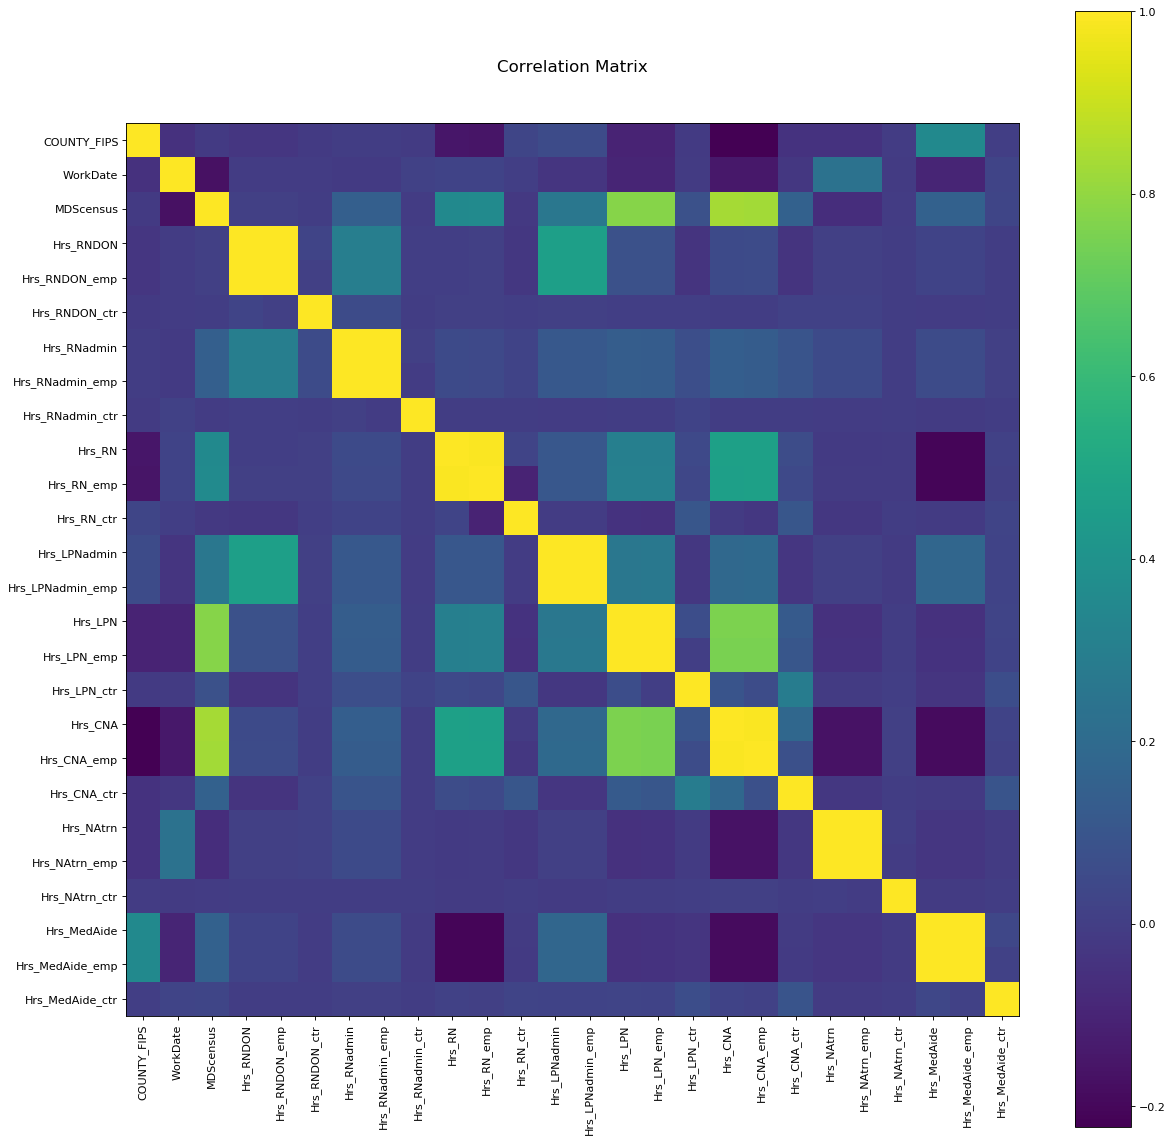

In [40]:
plotCorrelationMatrix(NurseDf, 18)

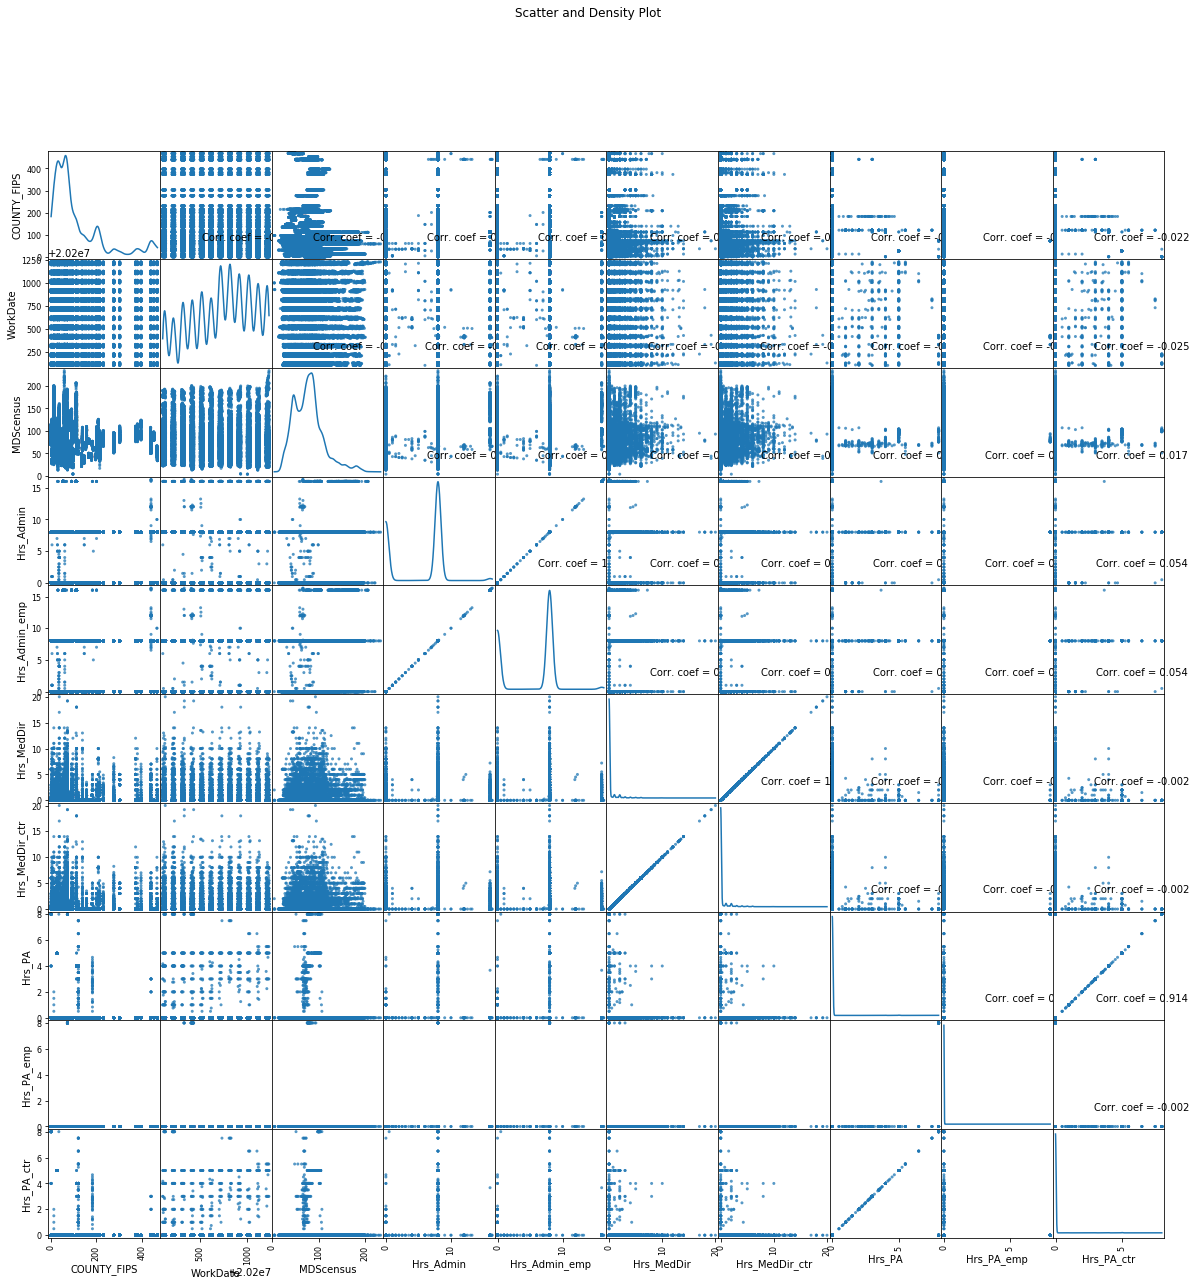

In [41]:
plotScatterMatrix(NonNurseDf, 20, 10)

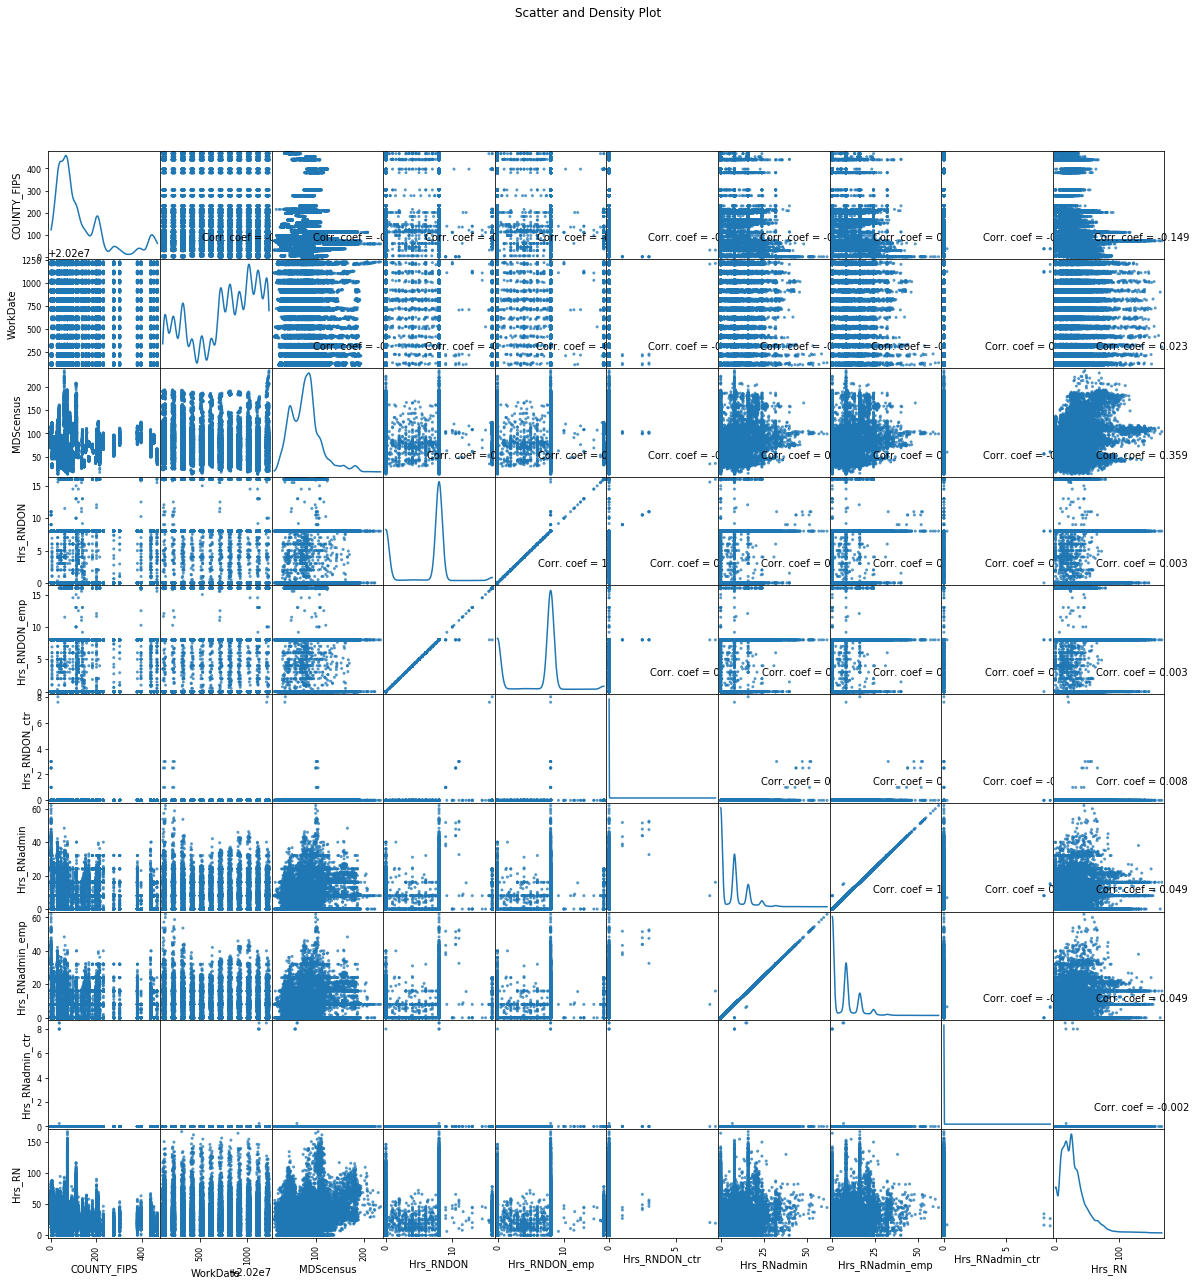

In [42]:
plotScatterMatrix(NurseDf, 20, 10)

In [45]:
NonNurseDf.to_excel('NonNurse.xlsx')
NurseDf.to_excel('Nurse.xlsx')